# Census Income Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Importing libraries

# Reading and Understanding the Data

In [2]:
df=pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Here we read the CSV file in jupyter notebook.

In [3]:
df=pd.DataFrame(data=df)
df.sample(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
14667,30,Private,185027,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
8191,45,Self-emp-not-inc,160962,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,35,United-States,<=50K
26073,47,Self-emp-inc,120131,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,Cuba,>50K
20748,37,Private,120074,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,<=50K
23126,27,Private,106316,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,12,United-States,<=50K
15981,44,Private,205706,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
30281,34,Private,28053,Bachelors,13,Married-spouse-absent,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,<=50K
18776,54,Private,225307,11th,7,Divorced,Craft-repair,Own-child,White,Female,0,0,50,United-States,>50K
18230,44,Private,145160,HS-grad,9,Never-married,Craft-repair,Other-relative,White,Male,0,0,58,United-States,<=50K
18064,32,Private,154571,Some-college,10,Never-married,Other-service,Other-relative,Asian-Pac-Islander,Male,0,0,40,?,<=50K


Loading the Dataset in the DataFrame and Taking out 10 samples from the dataset for our further understanding of the data.

# Data Inspection

In [4]:
df.shape

(32560, 15)

There are 32560 rows and 15 columns in our dataset.

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

There are 15 columns in our dataset and role of each column is easily understood by the title of that column

1. Age : Age of the person
2. WorkClass : The socioeconomic class in which a person is employed
3. Fnlwgt : Final Weight, it represents number of units in the target population that the responding unit represents.
4. Education : Qualification of a person
5. Education_number: Number of years of education completed of a person
6. Marital_status: If the person is married or not
7. Occupation: How does a person is employed
8. Relationship : How the other person who is being surveyed is related to the one who is employed in their family.
9. Race : Physical characteristics of group of people such as skin color
10. Sex : Gender of the person
11. Capital_gain: Profit from sale of property or an investment 
12. Capital_loss : Financial loss for the seller
13. Hours_per_week : Working hours per week 
14. Native_country: the country in which the person is born/belongs to
15. Income : The income of a person    

Here Income is our target variale and since we want to predict whether the income is greater than 50K or not , hence it's a problem of Classification.

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Out of 15 , 6 columns are of integer data type and 9 columns are of integer datatype.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


It gives us the Name of columns with its non-null value counts , it's datatype , index number and memory usage.

In [8]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


It gives us the mean, median , standard deviation, minimum and maximum of each numerical column.

# Exploratory Data Analysis

# Univariate Analysis

<AxesSubplot:xlabel='Income', ylabel='count'>

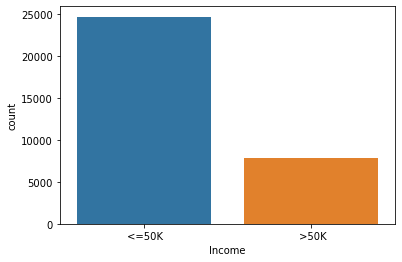

In [9]:
sns.countplot(df['Income'])

There exists a lot of class imbalance which we will  have to treat for our prediction

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

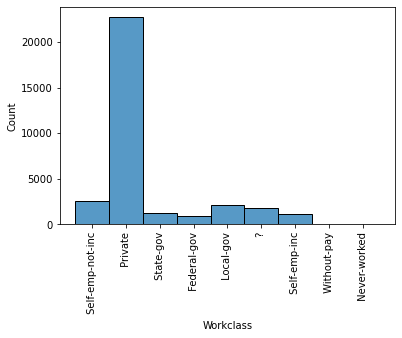

In [10]:
sns.histplot(df['Workclass'])
plt.xticks(rotation=90)

Maximum number of people work in a private sector.

<AxesSubplot:xlabel='Age', ylabel='Density'>

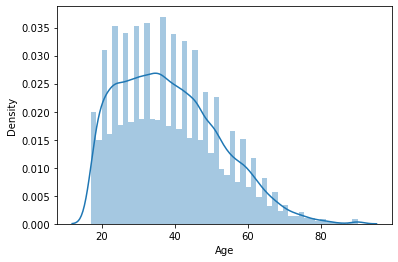

In [11]:
sns.distplot(df['Age'])

Maximum employees belong to an age group of 20-60. It is almost normally distributed.

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

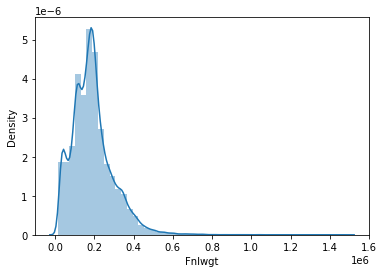

In [12]:
sns.distplot(df['Fnlwgt'])

This column 'fnlwgt' is not normalized. We will have to use transformation techniques on it.

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

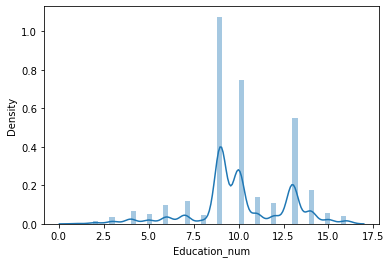

In [13]:
sns.distplot(df['Education_num'])

'Education_num' is not normalized , we will have to transform it.

<AxesSubplot:xlabel='Capital_gain', ylabel='Count'>

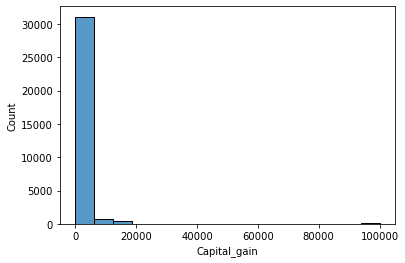

In [14]:
sns.histplot(df['Capital_gain'])

Only few people have capital_gain less than 2000. And almost 90% of people don't have capital_gain.

<AxesSubplot:xlabel='Capital_loss', ylabel='Count'>

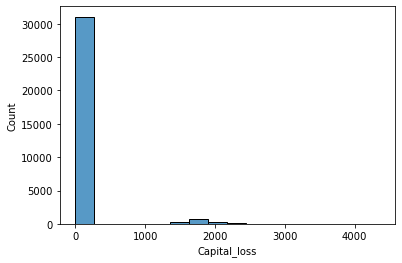

In [15]:
sns.histplot(df['Capital_loss'])

Almost 99% people doesn't face capital_loss

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

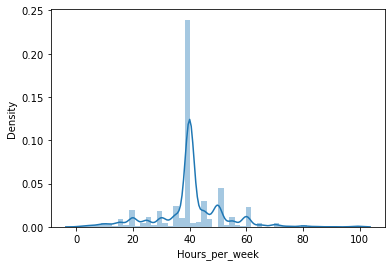

In [16]:
sns.distplot(df['Hours_per_week'])

Majority of the persons have to work 40 hours per week. Also this data is not normalized.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

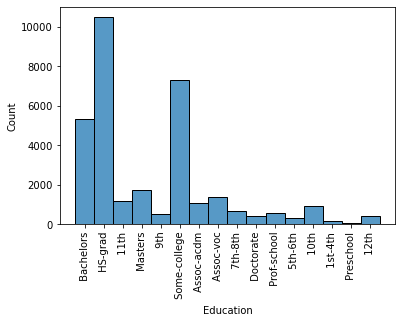

In [17]:
sns.histplot(df['Education'])
plt.xticks(rotation=90)

Majority of people are HS-grad, followed by 'Some-college Degree' , 'Bachelors' and Masters, and so on...

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

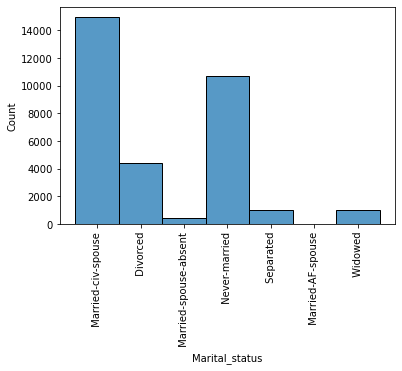

In [18]:
sns.histplot(df['Marital_status'])
plt.xticks(rotation=90)

Majority of the people are Married , followed by the ones who are 'Never-married' , 'Divorced' and 'Widowed'.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

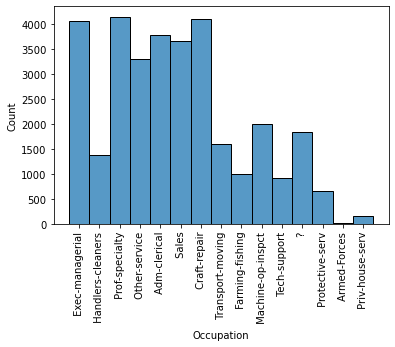

In [19]:
sns.histplot(df['Occupation'])
plt.xticks(rotation=90)

Majority of people are 'Craft-repair' or are 'Prof specialty', followed by 'Exec-managerial' , 'Adm-clerical', 'Sales' and 'Other services'. And least number of people are in 'Armed-Forces'.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

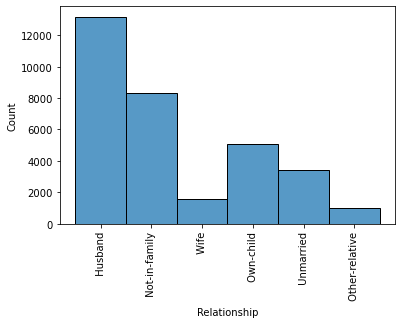

In [20]:
sns.histplot(df['Relationship'])
plt.xticks(rotation=90)

In majority of the families, Husband is the employed person and wife is employed in the least number of families.

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

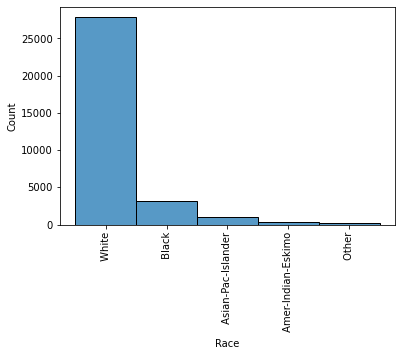

In [21]:
sns.histplot(df['Race'])
plt.xticks(rotation=90)

Majority of people in working sector belongs to white skin color, followed by black , Asian-Pac-Islander and so on...

<AxesSubplot:xlabel='Sex', ylabel='Count'>

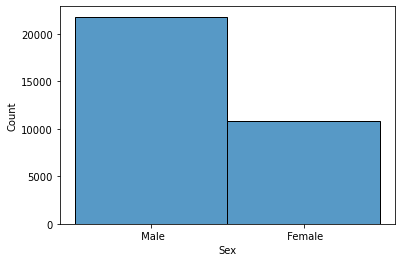

In [22]:
sns.histplot(df['Sex'])

Maximum employbility is distributed among 'Male'.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

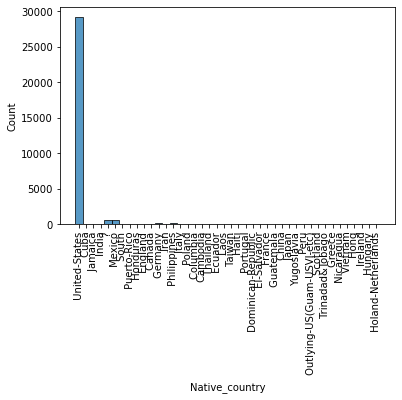

In [23]:
sns.histplot(df['Native_country'])
plt.xticks(rotation=90)

In the given dataset , the majority of people belong to 'Cuba'.

<AxesSubplot:xlabel='Age'>

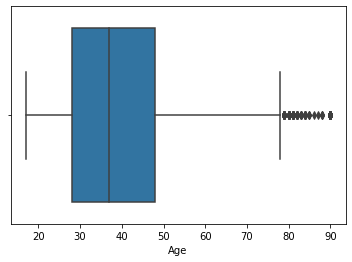

In [24]:
sns.boxplot(df['Age'])

There are few outliers in column 'Age'.

<AxesSubplot:xlabel='Fnlwgt'>

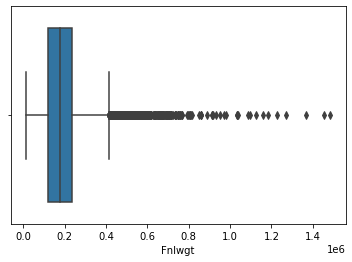

In [25]:
sns.boxplot(df['Fnlwgt'])

There are so many outliers in column 'Fnlwgt'

<AxesSubplot:xlabel='Education_num'>

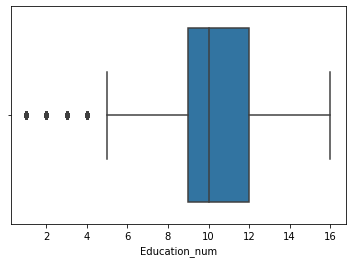

In [26]:
sns.boxplot(df['Education_num'])

There are few outliers in column 'Education_num'

<AxesSubplot:xlabel='Capital_gain'>

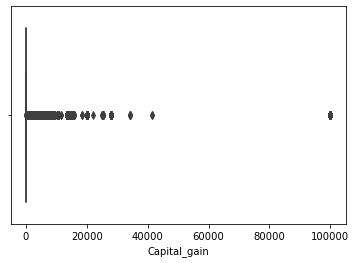

In [27]:
sns.boxplot(df['Capital_gain'])

This column can be dropped by studying more carefully later, as it doesn't add any value to the dataset as 99% of people are not gaining any capital_gain.

<AxesSubplot:xlabel='Capital_loss'>

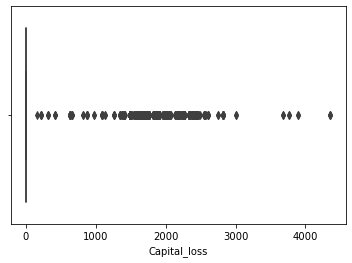

In [28]:
sns.boxplot(df['Capital_loss'])

There are only outliers in this column as well . 99% of people are neither facing capital_loss.

<AxesSubplot:xlabel='Hours_per_week'>

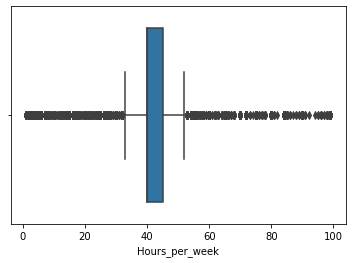

In [29]:
sns.boxplot(df['Hours_per_week'])

There are so many outliers in this column as well. Maximum people work for 40 hours_per_week.

# Bivariate Analysis

<AxesSubplot:xlabel='Income', ylabel='Age'>

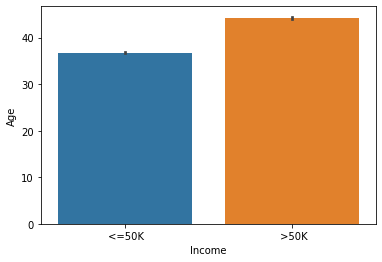

In [30]:
sns.barplot(y=df['Age'], x=df['Income'])

Maximum People in their 40s are earning more than 50K.

<AxesSubplot:xlabel='Income', ylabel='Fnlwgt'>

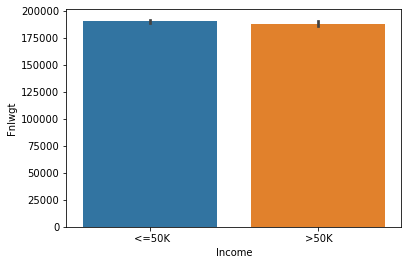

In [31]:
sns.barplot(y=df['Fnlwgt'], x=df['Income'])

'Fnlwgt' iss almost same for both the categories, the one that is earning less than 50K and the one earning more as well.

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

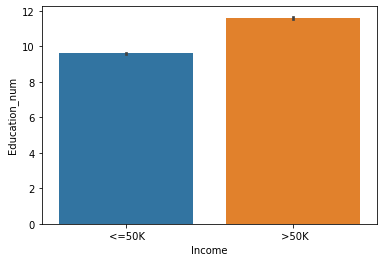

In [32]:
sns.barplot(y=df['Education_num'], x=df['Income'])

'Education_num' is directly proportional to 'Income'.

<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

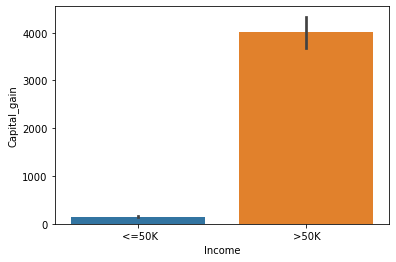

In [33]:
sns.barplot(y=df['Capital_gain'], x=df['Income'])

People having capital_gain are more likely to belong to the category of Income ' >50K'.

<AxesSubplot:xlabel='Income', ylabel='Capital_loss'>

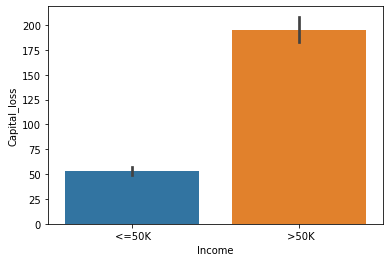

In [34]:
sns.barplot(y=df['Capital_loss'], x=df['Income'])

People having capital_loss greater than 100 belongs to class of people with '>50K' Income.

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

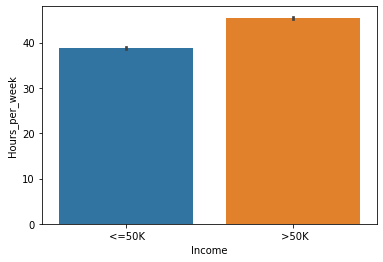

In [35]:
sns.barplot(y=df['Hours_per_week'], x=df['Income'])

More the number of hours people work every week , more the Income category ('>50K') they belong to.  

In [36]:
le = LabelEncoder()
dflist=['Workclass','Education','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
for column in dflist:
    df[column]=le.fit_transform(df[column])
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


We have converted categorical data to ordinal data.

Here In our Target variable 'Income' :

0 : Class with less than or equal to 50K Income (=<50K)     And      
1 : Class with more than 50K Income (>50K)    

<AxesSubplot:xlabel='Income', ylabel='Workclass'>

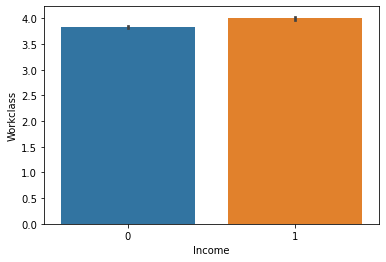

In [37]:
sns.barplot(y=df['Workclass'], x=df['Income'])

Workclass does not affect the Income much.

<AxesSubplot:xlabel='Income', ylabel='Education'>

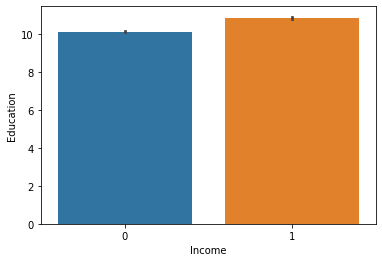

In [38]:
sns.barplot(y=df['Education'], x=df['Income'])

Even 'Education' doesnot affect much the Income category.

<AxesSubplot:xlabel='Marital_status', ylabel='Income'>

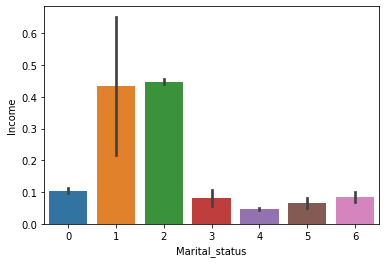

In [39]:
sns.barplot(x=df['Marital_status'], y=df['Income'])

Mostly the Married group of people fell into category '=<50K'.

<AxesSubplot:xlabel='Occupation', ylabel='Income'>

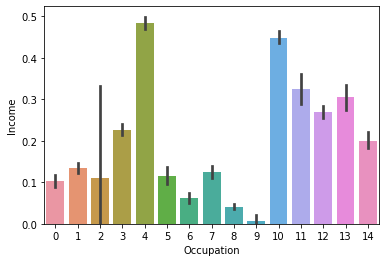

In [40]:
sns.barplot(x=df['Occupation'], y=df['Income'])

People in Occupation number '4' and '10' are more likely to fall in category '>50K'.

<AxesSubplot:xlabel='Income', ylabel='Relationship'>

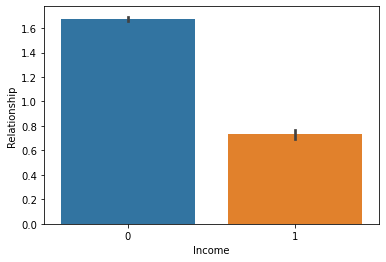

In [41]:
sns.barplot(y=df['Relationship'], x=df['Income'])

Husbands(1) are more likely to earn more ">50K".

<AxesSubplot:xlabel='Race', ylabel='Income'>

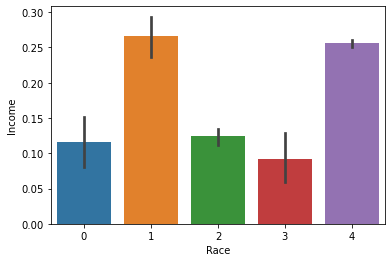

In [42]:
sns.barplot(x=df['Race'], y=df['Income'])

People belonging to race '1' and 4(White) are more likely to earn more '>50K' Income.

<AxesSubplot:xlabel='Income', ylabel='Sex'>

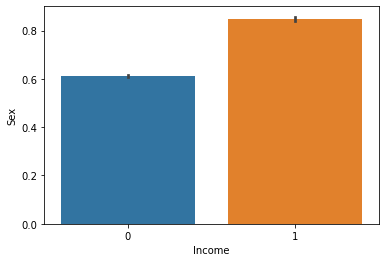

In [43]:
sns.barplot(y=df['Sex'], x=df['Income'])

'Male' (1) are more likely to fit in Income category '>50K'.

<AxesSubplot:xlabel='Income', ylabel='Native_country'>

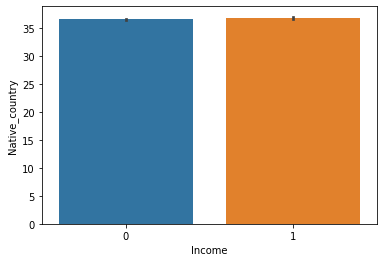

In [44]:
sns.barplot(y=df['Native_country'], x=df['Income'])

The Native_country does not play much role in deciding the Income class.

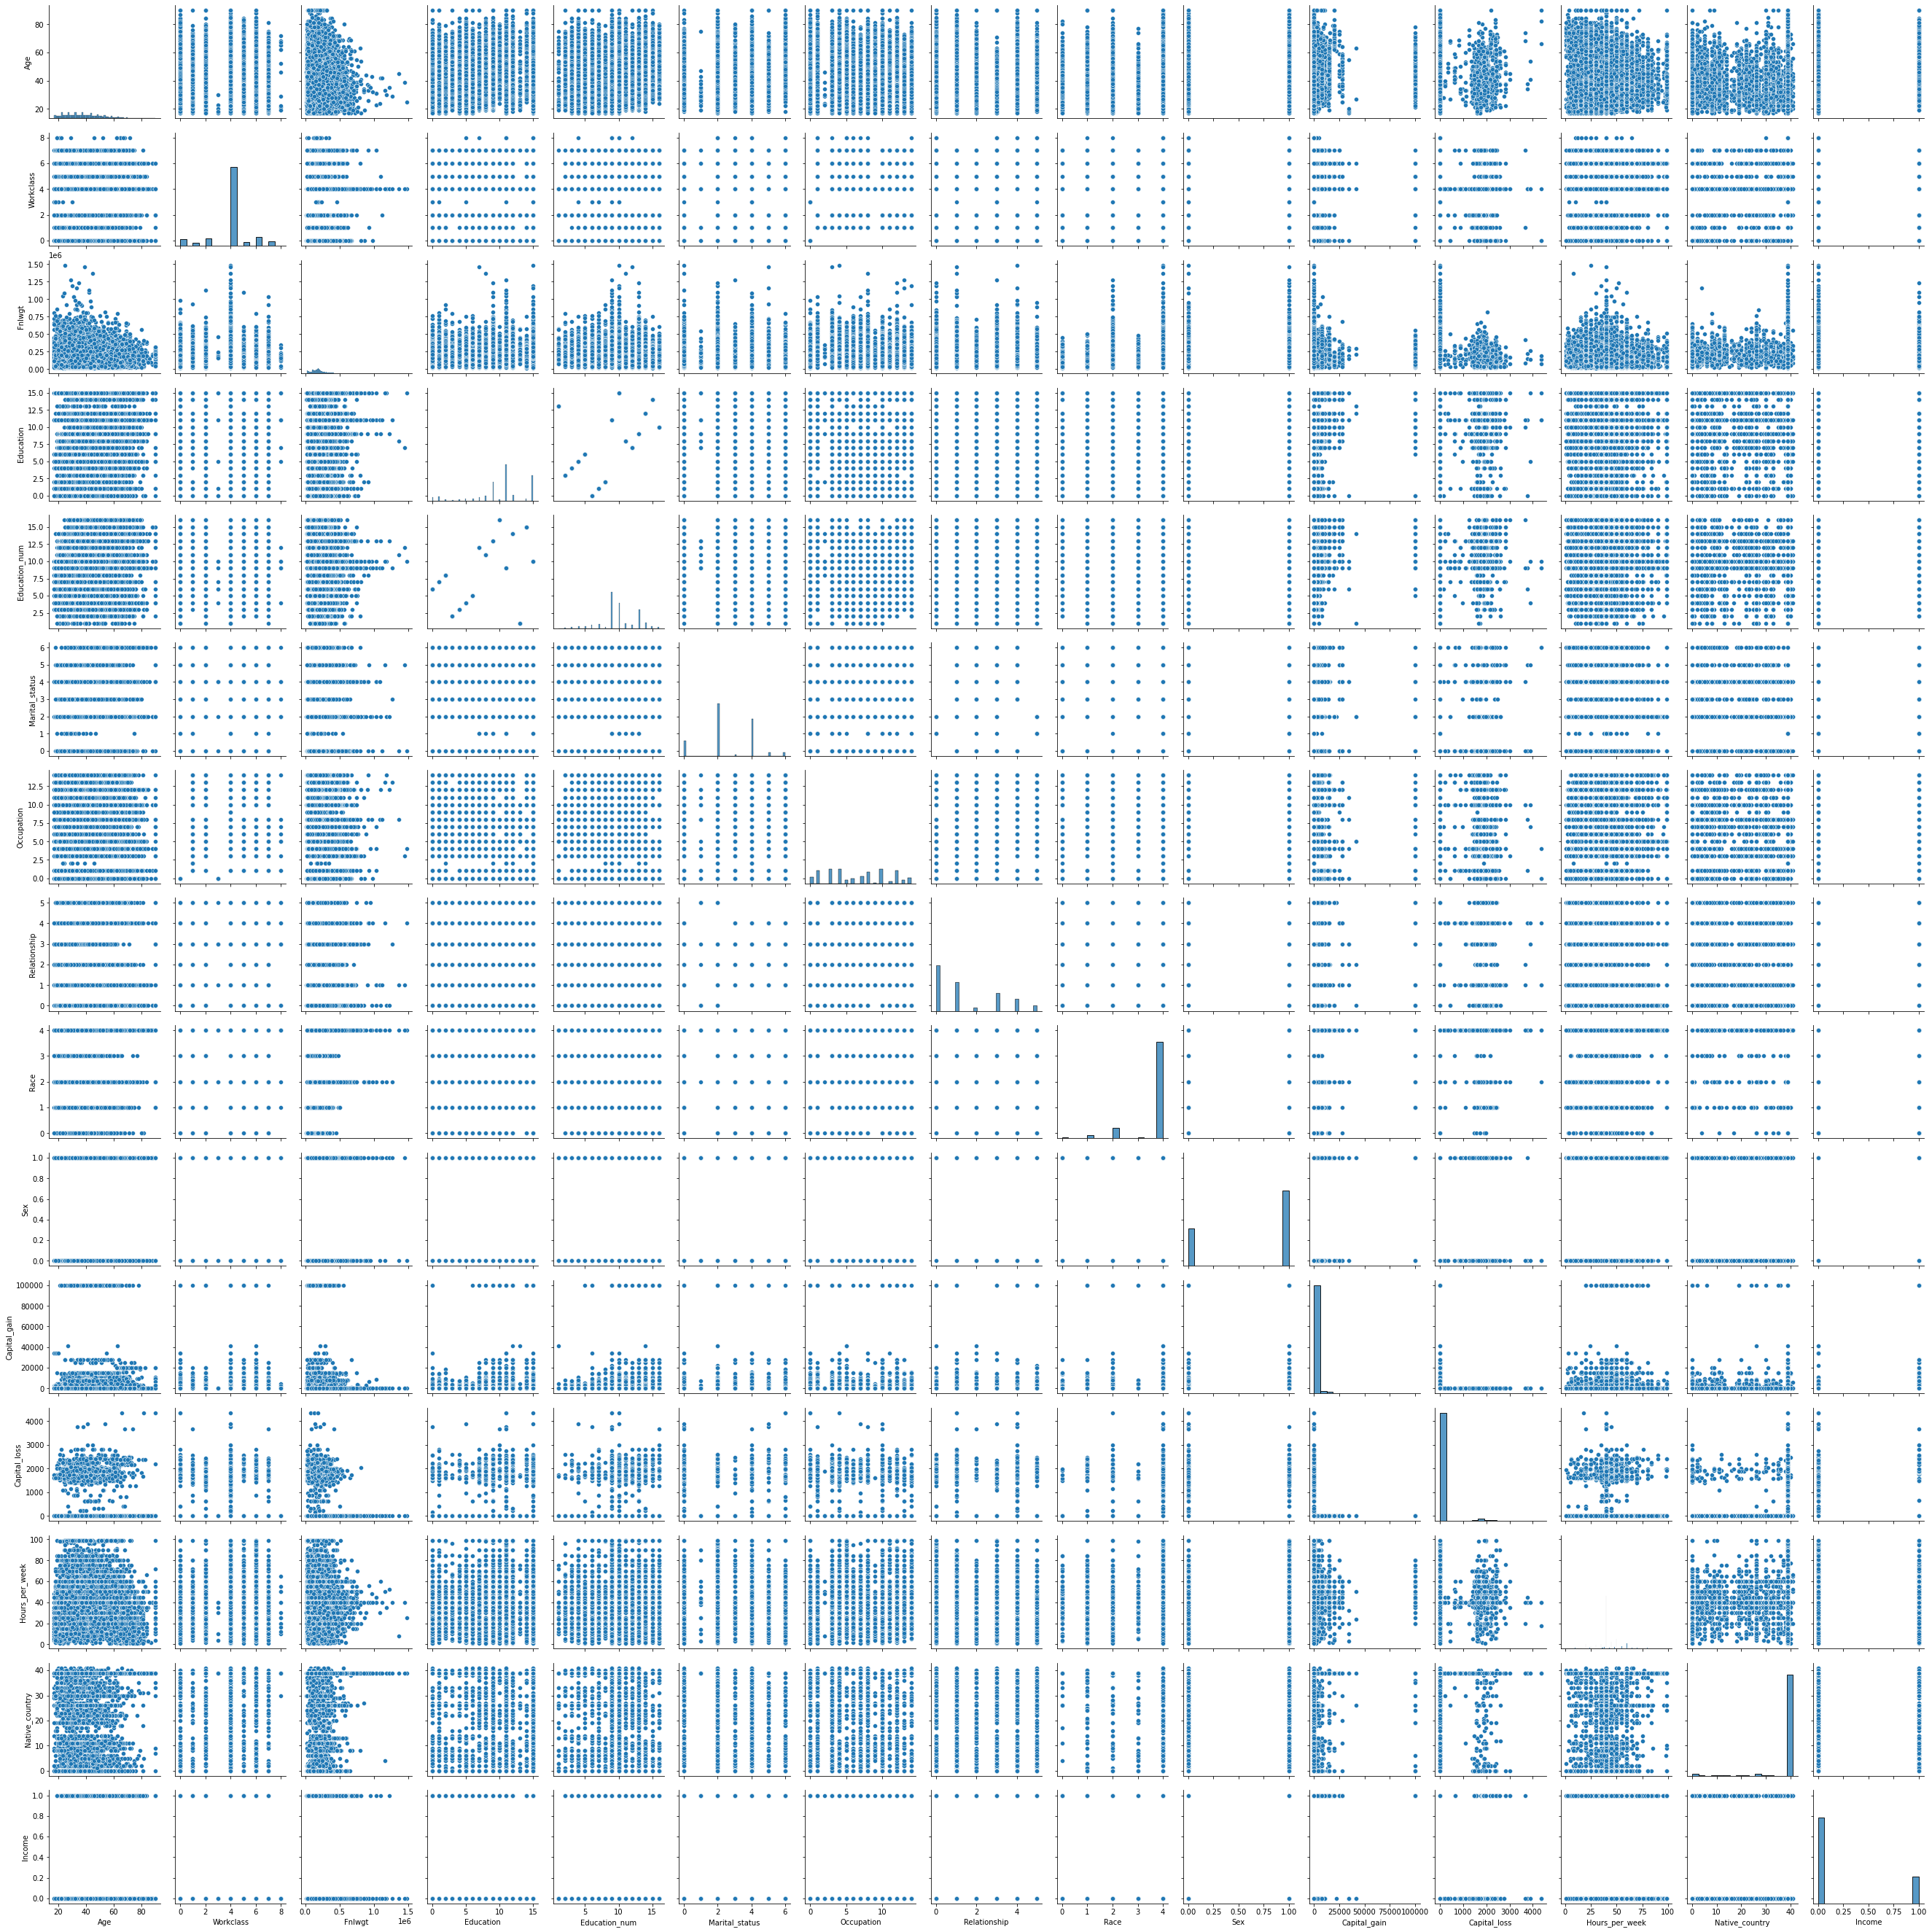

In [45]:
sns.pairplot(df)

Pairplot gives the graph of each column with every another column and itself as well.

# Multivariate Analysis

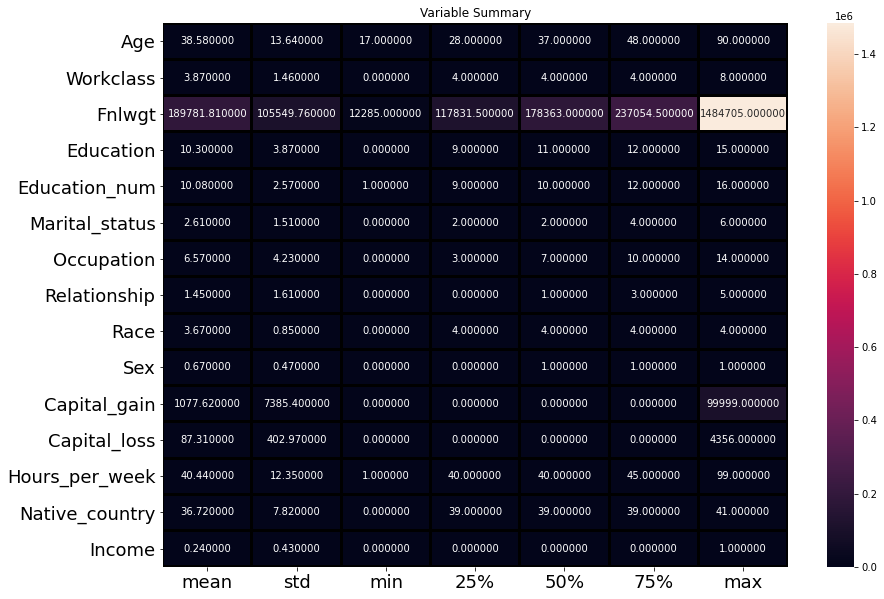

In [46]:
plt.figure(figsize=(14,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),lw=2,linecolor='black',annot=True,fmt='f',color='red')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Variable Summary')
plt.show()

It gives us the mean , median , mode , minimum, maximum of all the numeric columns.

<AxesSubplot:>

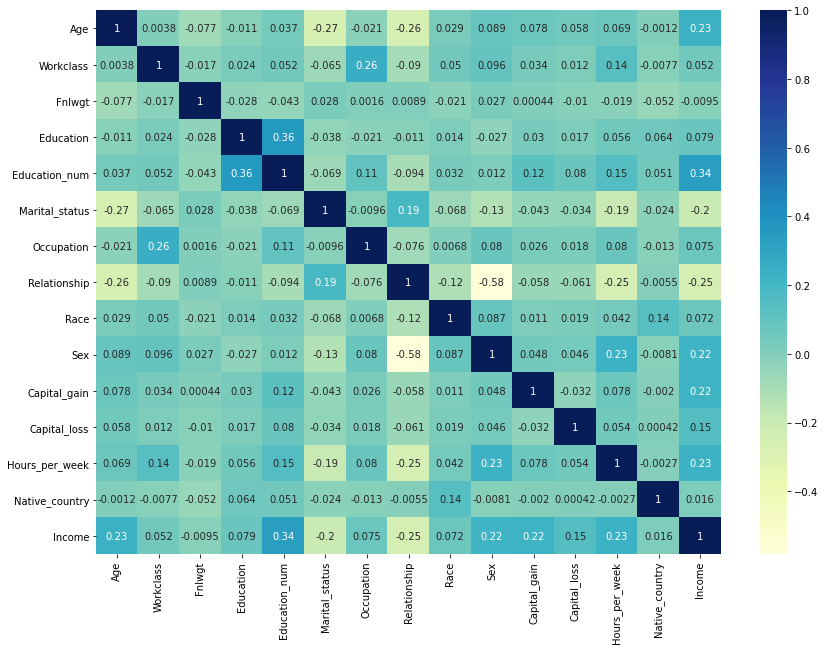

In [47]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)

There is no multi-collinearity in our dataset. Column 'Fnlwgt' is not related to our target variable , hence we can drop it.

# Data Cleaning

In [48]:
df.drop(['Fnlwgt'],axis=1,inplace=True)

We have dropped the column 'Fnlwgt'.

In [49]:
#Checking for Null values
df.isnull().sum()

Age               0
Workclass         0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no missing values in the dataset.

<AxesSubplot:>

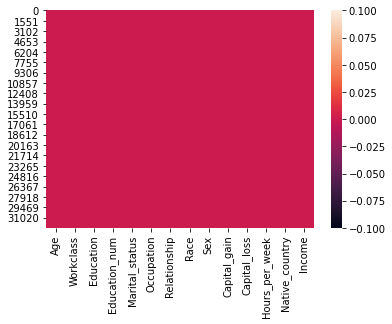

In [50]:
sns.heatmap(df.isnull())

This is the visualization of having absolute no null values in the dataset.

In [51]:
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3.5))

(array([    3,    13,    14, ..., 32524, 32530, 32550], dtype=int64), array([12, 12,  7, ..., 12, 11,  7], dtype=int64))


Here we have printed the Outliers in our dataset.

In [52]:
dfnew=df[(dfzscore<3.5).all(axis=1)]
df=dfnew
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,1,7,2,6,0,2,1,0,0,40,39,0
4,37,4,12,14,2,4,5,4,0,0,0,40,39,0
5,49,4,6,5,3,8,1,2,0,0,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,11,9,4,1,3,4,1,0,0,20,39,0


We have removed the outliers successfully. 

In [53]:
print(((32560-29232)/32560)*100,"%")

10.221130221130222 %


There is 10.22% data loss in our dataset , which is under the acceptable range. 

In [54]:
df.skew()

Age                0.528379
Workclass         -0.747019
Education         -0.935374
Education_num     -0.258568
Marital_status    -0.038003
Occupation         0.127946
Relationship       0.750927
Race              -2.406950
Sex               -0.686020
Capital_gain       5.101894
Capital_loss      16.671159
Hours_per_week    -0.246462
Native_country    -4.717603
Income             1.318865
dtype: float64

There is skewness in only Two numerical columns : 'Capital_gain' and 'Capital_loss'.

In [55]:
from sklearn.preprocessing import power_transform
a=df.drop(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Hours_per_week', 'Native_country', 'Income'],axis=1)
a=power_transform(a,method='yeo-johnson')

Treating skewness by using Power Transformation Technique.

<AxesSubplot:xlabel='Income', ylabel='count'>

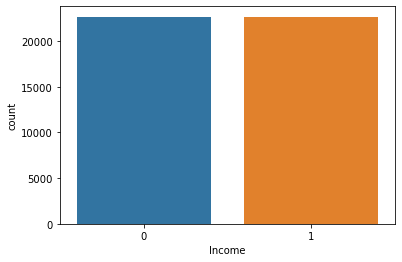

In [56]:
x=df.drop(['Income'],axis=1)
y=df['Income']

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x)

from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y = smt.fit_resample(x,y)
sns.countplot(y)

Scaling the data and treating Class Imbalance

# Model Building

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=54)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_train_lr=lr.predict(x_train)
predlr=lr.predict(x_test)
print('Accuracy of Logistic Regression is',(accuracy_score(y_test,predlr))*100,'%')

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy of RandomForest Classifier is',(accuracy_score(y_test,predrf))*100,'%')

kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
predkn=kn.predict(x_test)
print('Accuracy of KNeighbors Classifier is',(accuracy_score(y_test,predkn))*100,'%')

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print('Accuracy of DecisionTree Classifier is',(accuracy_score(y_test,preddt))*100,'%')

sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print('Accuracy of SVC is',(accuracy_score(y_test,predsv))*100,'%')

Accuracy of Logistic Regression is 76.73469387755102 %
Accuracy of RandomForest Classifier is 89.43188086045228 %
Accuracy of KNeighbors Classifier is 85.52675124103696 %
Accuracy of DecisionTree Classifier is 85.81356867071153 %
Accuracy of SVC is 83.19911748483177 %


Here we get accuracies of all the 5 models we have used.

# Cross Validation Score

In [58]:
print("CVS for Logistic Regression =",cvs(lr,x,y,cv=5).mean()*100,"%")
print("CVS for Random Forest Classifier =",cvs(rf,x,y,cv=5).mean()*100,"%")
print("CVS for K-Neighbor Classifier =",cvs(kn,x,y,cv=4).mean()*100,"%")
print("CVS for DecisionTree Classifier =",cvs(dt,x,y,cv=5).mean()*100,"%")
print("CVS for Support Vector Machine Classifier =",cvs(sv,x,y,cv=5).mean()*100,"%")

CVS for Logistic Regression = 76.64593022151968 %
CVS for Random Forest Classifier = 89.04119629293 %
CVS for K-Neighbor Classifier = 85.46906716088607 %
CVS for DecisionTree Classifier = 85.81333304772973 %
CVS for Support Vector Machine Classifier = 83.0509252340043 %


The least difference between accuracy and cvs is for model 'DecisionTreeClassifier', 'LogisticRegression', 'KNeighborClassifier' and 'RandomForestClassifier'. But since all the differences are almost same and the accuracy of 'RandomForestClassfier' is most , we will hypertune that model.

# Hyper Parameter Tuning

In [59]:
parameter={'n_estimators':np.arange(50,300,50),
          'criterion':['gini','entropy'],
          'max_features':['auto','sqrt','log2'],
          'class_weight':['balanced', 'balanced_subsample']}
gvc = GridSearchCV(RandomForestClassifier(),parameter,cv=5)
gvc.fit(x_train,y_train)
gvc.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'n_estimators': 200}

We get the best parameters to be used in RandomForestClassifier() to increase it's accuracy.

In [60]:
IncomePrediction = RandomForestClassifier(criterion='entropy', n_estimators=200, max_features='sqrt', class_weight='balanced')
IncomePrediction.fit(x_train,y_train)
pred=IncomePrediction.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classifier of Final Income Prediction Model is ", acc*100, "%.")

Accuracy of Random Forest Classifier of Final Income Prediction Model is  89.64147821290679 %.


The accuracy of our final model has been increased after applying Hyper Parameter Tuning.

# AUC-ROC CURVE

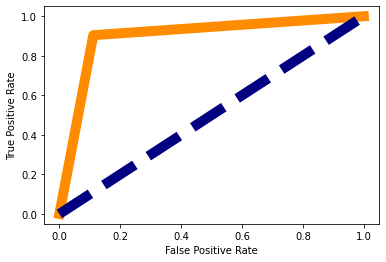

In [61]:
from sklearn.metrics import roc_curve , auc
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE")
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Since the model without outliers and Class Imbalance is working welll. Hence we will choose that only.

# Conclusion

In [62]:
a= np.array(y_test)
predicted = np.array(IncomePrediction.predict(x_test))
Income_Prediction=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
Income_Prediction

,Original,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
9060,0,0
9061,1,1
9062,1,1
9063,0,0


We can see that Original Value is equal to the Predicted value for all the data which is visible. Our model is really working well.

# Model Saving

In [63]:
import pickle
filename = 'Census.pkl'
pickle.dump(IncomePrediction,open(filename,'wb'))

We have saved our final model .